### Import Library

In [1]:
# from google.colab import drive
# drive.mount("/content/drive/")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn import feature_extraction, model_selection, pipeline, manifold, preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import naive_bayes, svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  cross_val_score
import seaborn as sns

In [4]:
import pickle

### Import Dataset

In [5]:
# test_df = pd.read_pickle('/content/drive/MyDrive/Tesis/saved_data/data_with_label_up2.pkl')

In [6]:
# test_df_visual = test_df[test_df['aspect_entity'].map(lambda x: 'visual' in x)]
# len(test_df_visual)

In [7]:
# test_df_visual.head()

In [8]:
# df_review = pd.read_pickle('C:/Users/Sistem Cerdas Two/Downloads/run actor/segmentasi_sentimen_up2.pkl')

In [9]:
df_review = pd.read_pickle('D:/s2 ugm/tesis/program/run/segmentasi_sentimen_up2.pkl')

In [10]:
df_review = df_review.reset_index(drop=True)

In [11]:
# df_review

In [12]:
df_sentiment_analysis = df_review[["clean_content","aspect_entity","sentiment"]]

In [13]:
df_sentiment_analysis.head()

,clean_content,aspect_entity,sentiment
0,like game alot game control smooth game run sm...,"{GAMEPLAY, VISUAL}",positive
1,game well mobile game but game problem first m...,{GAMEPLAY},positive
2,game great matchmake pretty terrible but main ...,{GAMEPLAY},Negative
3,beyond hooked game much strategy definitely p...,{ACTOR},positive
4,play game since got release think there probl...,{GAMEPLAY},positive


In [14]:
items_aspect = [] 
for i in df_sentiment_analysis['aspect_entity']:
  for j in i:
    items_aspect.append(j) 

In [15]:
# ax = plt.hist(items_aspect)
# plt.show()

### Aspects Mobile Game Quality model

In [16]:
df_sentiment_visual = df_sentiment_analysis[df_sentiment_analysis['aspect_entity'].map(lambda x: 'VISUAL' in x)]

In [17]:
sentimen_visual_counts = df_sentiment_visual['sentiment'].value_counts()
sentimen_visual_counts

positive    14149
Negative     3634
Neutral       336
Name: sentiment, dtype: int64

In [18]:
len(df_sentiment_visual)

18119

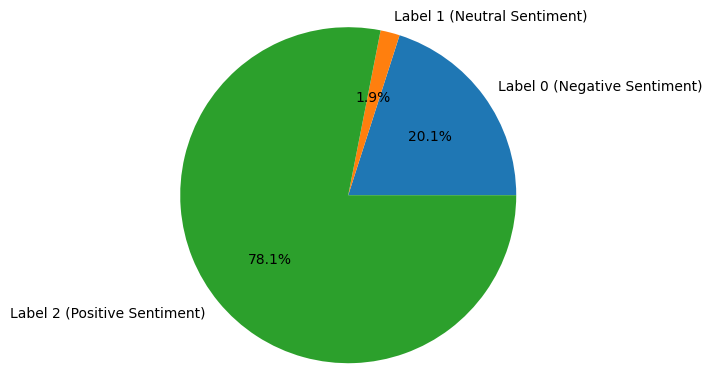

In [19]:
# Class Imbalance Check
plt.pie(df_sentiment_visual['sentiment'].value_counts().sort_index(ascending=True), 
        labels=['Label 0 (Negative Sentiment)', 'Label 1 (Neutral Sentiment)', 'Label 2 (Positive Sentiment)'], 
        autopct='%0.1f%%')
plt.axis('equal')
plt.show()

### Split data for train and test

In [20]:
# Train-Test Splitting
X = df_sentiment_visual['clean_content']
Y = df_sentiment_visual['sentiment']
# test_visual_review = test_df_visual

# Dictionary mapping
mapping = {'positive': 2, 'Neutral': 1, 'Negative': 0}

Y = Y.map(mapping)

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, stratify=Y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
# print(X.shape, test_visual_review.shape, Y.shape)

(14495,) (3624,) (14495,) (3624,)


### TF-IDF feature extraction

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

# calc TF vector
cvect = CountVectorizer()
TF_vector = cvect.fit_transform(x_train)

# normalize TF vector
normalized_TF_vector = normalize(TF_vector, norm='l1', axis=1)

# calc IDF
idf_vec = TfidfVectorizer(smooth_idf=False)
idf_calc = idf_vec.fit(x_train)
IDF_vector = idf_vec.idf_

# hitung TF x IDF sehingga dihasilkan TFIDF matrix / vector
tfidf_vector = normalized_TF_vector.multiply(IDF_vector)
tfidf_mat = normalized_TF_vector.multiply(IDF_vector).todense()

# tfidf_mat

# print(normalized_TF_vector)

# print(tfidf_vector)

# feature_names = idf_calc.vocabulary_
# feature_names

# tfidf_df = pd.DataFrame(idf_calc.fit_transform(x_train).todense())
# tfidf_df.columns = idf_calc.vocabulary_
# # tfidf_df

tfidf_df_test = pd.DataFrame(idf_calc.transform(x_test).todense())
tfidf_df_test.columns = idf_calc.vocabulary_
# tfidf_df_test

In [22]:
# # normalize TF vector
# normalized_TF_vector = normalize(TF_vector, norm='l1', axis=1)

# # calc IDF
# idf_vec = TfidfVectorizer(smooth_idf=False)
# idf_calc = idf_vec.fit(x_train)
# IDF_vector = idf_vec.idf_

# # hitung TF x IDF sehingga dihasilkan TFIDF matrix / vector
# tfidf_vector = normalized_TF_vector.multiply(IDF_vector)
# tfidf_mat = normalized_TF_vector.multiply(IDF_vector).todense()

In [23]:
# tfidf_mat

In [24]:
# print(normalized_TF_vector)

In [25]:
# print(tfidf_vector)

In [26]:
# feature_names = idf_calc.vocabulary_
# feature_names

In [27]:
# tfidf_df = pd.DataFrame(idf_calc.fit_transform(x_train).todense())
# tfidf_df.columns = idf_calc.vocabulary_
# # tfidf_df

In [28]:
# tfidf_df_test = pd.DataFrame(TF_vector.transform(x_test).todense())
# tfidf_df_test.columns = TF_vector.vocabulary_
# # tfidf_df_test

In [29]:
# print(tfidf_df.shape, tfidf_df_test.shape)

In [30]:
# X_tfidf = pd.DataFrame(idf_calc.fit_transform(X).todense())
# test_tfidf = pd.DataFrame(idf_calc.transform(test_visual_review['content']).todense())
# X_tfidf.columns = idf_calc.vocabulary_
# test_tfidf.columns = idf_calc.vocabulary_
# X_tfidf

In [31]:
# print(X_tfidf.shape, test_tfidf.shape)

###Oversampling - Normalize imbalance sentiment

In [32]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
# from imblearn.combine import SMOTEENN, SMOTETomek

In [33]:
ros = RandomOverSampler(random_state=100)
sm = SMOTE(sampling_strategy='auto')
# se = SMOTETomek(random_state=100)

In [34]:
# x_train_smote, y_train_smote = sm.fit_resample(tfidf_vector, y_train.values)
# print(x_train_smote.shape, y_train_smote.shape)

# # # SMOTE on full training data
# # X_smote, Y_smote = sm.fit_resample(X_tfidf, Y.values)
# # print(X_smote.shape, Y_smote.shape)

# # Class Imbalance Check
# plt.pie(pd.value_counts(y_train_smote), 
#         labels=['Label 0 (Negative Sentiment)', 'Label 1 (Neutral Sentiment)', 'Label 2 (Positive Sentiment)'], 
#         autopct='%0.1f%%')
# plt.axis('equal')
# plt.show()

In [35]:
# sentimen_visual_counts = pd.Series(y_train_smote).value_counts()
# sentimen_visual_counts 

### Classifier

In [36]:
### 
def train_and_eval(model, trainX, trainY, testX, testY):

    # training
    _ = model.fit(trainX, trainY)

    # predictions
    train_and_eval.y_preds_train = model.predict(trainX)
    train_and_eval.y_preds_test = model.predict(testX)

    # evaluation
    print()
    print(model)
    print(f"Train accuracy score : {accuracy_score(trainY, train_and_eval.y_preds_train)}")
    print(f"Test accuracy score : {accuracy_score(testY, train_and_eval.y_preds_test)}")
    print(f"diff : {accuracy_score(trainY, train_and_eval.y_preds_train) - accuracy_score(testY, train_and_eval.y_preds_test)}" )
    print('\n',40*'-')

#### Naive Bayes

In [37]:
# Define model
nb_model = naive_bayes.MultinomialNB()
    
# Train and evaluate model
train_and_eval(model=nb_model, 
              #  param_grid = {},
               trainX= tfidf_vector,
               trainY= y_train, 
               testX=tfidf_df_test, 
               testY=y_test)
pred_nb = train_and_eval.y_preds_test
best_model_nb = nb_model
# best_model_nb = train_and_eval.best_model
scores_nb = accuracy_score(y_test, train_and_eval.y_preds_test)
# print(best_model_nb)
print(scores_nb)

d:\dekstop_app\python_environment\mini\envs\python_tesis\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(



MultinomialNB()
Train accuracy score : 0.7966885132804415
Test accuracy score : 0.7811810154525386
diff : 0.01550749782790295

 ----------------------------------------
0.7811810154525386


####SVM

In [38]:
# # Hyperparameters
# C = [1,2,4,5,8,10]
# gamma = [0.08, 0.8, 0.5, 0.05, 0.01, 0.1, 1, 10]
scores = []
models = []

# for c in C:
#   for g in gamma: 
svc_model = svm.SVC()
    
    # Train and evaluate model
train_and_eval(model=svc_model, 
                   trainX=tfidf_vector,
                   trainY= y_train,  
                   testX=tfidf_df_test, 
                   testY=y_test)
scores.append(accuracy_score(y_test, train_and_eval.y_preds_test))
models.append(svc_model)

best_index = scores.index(max(scores))
best_model = models[best_index]
print(best_model)

d:\dekstop_app\python_environment\mini\envs\python_tesis\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(



SVC()
Train accuracy score : 0.9523283890996895
Test accuracy score : 0.8620309050772627
diff : 0.09029748402242688

 ----------------------------------------
SVC()


In [39]:
# best_model = svm.SVC(C = 10, gamma = 1, kernel='rbf', decision_function_shape='ovr')
# print(best_model)

In [40]:
# with open('/content/drive/MyDrive/Tesis/saved_data/model_saved/best_model_visual_imp.pkl', 'wb') as f:
#     pickle.dump(best_model, f)

In [41]:
print(best_model)

SVC()


In [42]:
# Train and evaluate model
train_and_eval(model=best_model, 
              #  param_grid = {},
               trainX=tfidf_vector,
               trainY= y_train, 
               testX=tfidf_df_test, 
               testY=y_test)
best_y_preds_test = train_and_eval.y_preds_test
# best_model_nb = nb_model
# best_model_nb = train_and_eval.best_model
# scores_nb = accuracy_score(y_test, train_and_eval.y_preds_test)
# # print(best_model_nb)
# print(scores_nb)

d:\dekstop_app\python_environment\mini\envs\python_tesis\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(



SVC()
Train accuracy score : 0.9523283890996895
Test accuracy score : 0.8620309050772627
diff : 0.09029748402242688

 ----------------------------------------


In [43]:
# # training
# _ = best_model.fit(tfidf_vector, y_train)

# # predictions
# best_y_preds_train = best_model.predict(tfidf_vector)
# best_y_preds_test = best_model.predict(tfidf_df_test)

#     # evaluation
# print()
# print(best_model)
# print(f"Train accuracy score : {accuracy_score(tfidf_vector, best_y_preds_train)}")
# print(f"Test accuracy score : {accuracy_score(y_test, best_y_preds_test)}")
# print('\n',40*'-')

#####Sample predict with data test

In [44]:
# original_text = idf_calc.inverse_transform(tfidf_df_test)
# len(original_text)

In [45]:
# content_test = []
# for row in original_text:
#     content_list = ' '.join(row)
#     content_test.append(content_list)

In [46]:
# df_predict_review_game = pd.DataFrame({'Content':content_test,'Sentiment':y_test, 'Predict Sentiment':best_y_preds_test})

In [47]:
# df_predict_review_game

In [48]:
# df_predict_review_game.to_csv(r'/content/drive/MyDrive/Tesis/saved_data/data_predict_visual.csv', index=False, header=True)

##### predict for all data in aspect

In [49]:
# best_model_all.fit(X_smote, Y_smote)
# predictions = best_model_all.predict(test_tfidf)
# submission = pd.DataFrame({'content': test_visual_review.content, 'label':predictions})
# submission.head()

In [50]:
# submission.to_csv('Submission.csv', index=False)
# print('Submission is successful!')

### Validation K-Fold Cross

####NB validation

In [51]:
# # create pipeline
# pipeline_nb = Pipeline(steps=[('model', best_model_nb)])

# # perform cross validation
# scoresY = cross_val_score(estimator=pipeline_nb, 
#                          X=TF_vector, 
#                          y=y_train, 
#                          scoring='accuracy', 
#                          cv=10,
#                          n_jobs=-1) 
# scoresY

In [52]:
# create pipeline
pipeline_nb = Pipeline(steps=[('model', best_model_nb)])

# perform cross validation
scoresY = cross_val_score(estimator=pipeline_nb, 
                         X=tfidf_vector, 
                         y=y_train, 
                         scoring='accuracy', 
                         cv=5,
                         n_jobs=-1) 
scoresY

array([0.78371852, 0.78302863, 0.78440842, 0.78406347, 0.78509831])

####SVM validation

In [53]:
# create pipeline
pipeline = Pipeline(steps=[('model', best_model)])

# perform cross validation
scores = cross_val_score(estimator=pipeline, 
                         X=tfidf_vector, 
                         y=y_train, 
                         scoring='accuracy', 
                         cv=10,
                         n_jobs=-1) 
scores

array([0.8537931 , 0.85724138, 0.85310345, 0.85310345, 0.84275862,
       0.8447205 , 0.85576259, 0.83712905, 0.85576259, 0.83919945])

In [54]:
# create pipeline
pipeline = Pipeline(steps=[('model', best_model)])

# perform cross validation
scoresX = cross_val_score(estimator=pipeline, 
                         X=TF_vector, 
                         y=y_train, 
                         scoring='accuracy', 
                         cv=5,
                         n_jobs=-1) 
scoresX


array([0.85270783, 0.85132804, 0.85443256, 0.84787858, 0.84787858])

### Evaluation

#### Confusion Matrix NB

In [55]:
from sklearn import metrics
import numpy as np
accuracy_nb = metrics.accuracy_score(y_test, pred_nb)



## Precision e Recall
recall_nb = metrics.recall_score(y_test, pred_nb, average='weighted')
precision_nb = metrics.precision_score(y_test, pred_nb, average='weighted')
f1_nb = 2 * (precision_nb*recall_nb)/(precision_nb + recall_nb)
print("Accuracy: ", accuracy_nb)
print("Recall (all 1s predicted right):", round(recall_nb,4))
print("Precision (confidence when predicting a 1):", round(precision_nb,4))
print("F1-score: ", round(f1_nb,4))
print("Detail:")
print(metrics.classification_report(y_test, pred_nb, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy:  0.7811810154525386
Recall (all 1s predicted right): 0.7812
Precision (confidence when predicting a 1): 0.7438
F1-score:  0.7621
Detail:
              precision    recall  f1-score   support

           0       0.67      0.00      0.01       727
           1       0.00      0.00      0.00        67
           2       0.78      1.00      0.88      2830

    accuracy                           0.78      3624
   macro avg       0.48      0.33      0.29      3624
weighted avg       0.74      0.78      0.69      3624



d:\dekstop_app\python_environment\mini\envs\python_tesis\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\dekstop_app\python_environment\mini\envs\python_tesis\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\dekstop_app\python_environment\mini\envs\python_tesis\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_test)

y_true_bin = lb.transform(y_test)
y_preds_bin = lb.transform(pred_nb)

n_classes = y_true_bin.shape[1]
roc_auc = dict()
for i in range(n_classes):
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_preds_bin[:, i])

# hitung rata-rata AUC-ROC untuk semua kelas
mean_auc = sum(roc_auc.values()) / n_classes
print("AUC-ROC rata-rata:", mean_auc)

AUC-ROC rata-rata: 0.5007618969600435


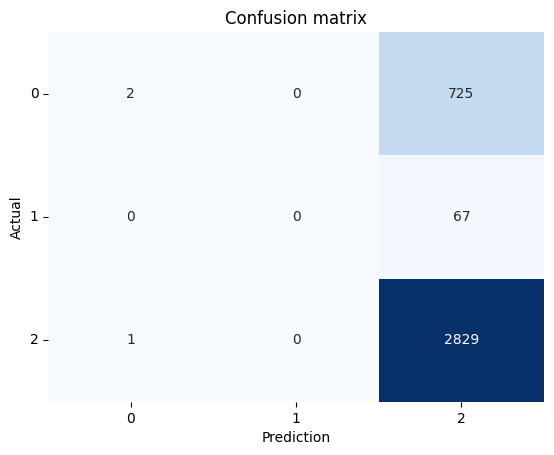

In [57]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, pred_nb, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Prediction", ylabel="Actual", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

#### Confusion Matrix SVM

In [58]:
# best_y_preds_test = best_model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, best_y_preds_test)


## Precision e Recall

recall = metrics.recall_score(y_test, best_y_preds_test, average='weighted')
precision = metrics.precision_score(y_test, best_y_preds_test, average='weighted')
f1 = 2 * (precision*recall)/(precision + recall)
print("Accuracy: ", accuracy)
print("Recall (all 1s predicted right):", round(recall,4))
print("Precision (confidence when predicting a 1):", round(precision,4))
print("F1-score: ", round(f1,4))
print("Detail:")
print(metrics.classification_report(y_test, best_y_preds_test, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy:  0.8620309050772627
Recall (all 1s predicted right): 0.862
Precision (confidence when predicting a 1): 0.8405
F1-score:  0.8511
Detail:
              precision    recall  f1-score   support

           0       0.79      0.53      0.63       727
           1       0.00      0.00      0.00        67
           2       0.87      0.97      0.92      2830

    accuracy                           0.86      3624
   macro avg       0.56      0.50      0.52      3624
weighted avg       0.84      0.86      0.84      3624



d:\dekstop_app\python_environment\mini\envs\python_tesis\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\dekstop_app\python_environment\mini\envs\python_tesis\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\dekstop_app\python_environment\mini\envs\python_tesis\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

In [59]:
# print(best_y_preds_test)

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_test)

y_true_bin = lb.transform(y_test)
y_preds_bin = lb.transform(best_y_preds_test)

n_classes = y_true_bin.shape[1]
roc_auc = dict()
for i in range(n_classes):
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_preds_bin[:, i])

# hitung rata-rata AUC-ROC untuk semua kelas
mean_auc = sum(roc_auc.values()) / n_classes
print("AUC-ROC rata-rata:", mean_auc)

AUC-ROC rata-rata: 0.6600059282204964


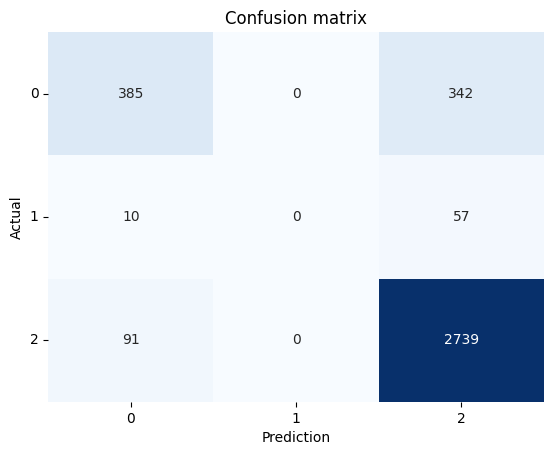

In [61]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, best_y_preds_test, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Prediction", ylabel="Actual", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

In [62]:
# print(classification_report(y_test, best_y_preds_test))

In [63]:
# def plot_cm(y_true, y_pred):
#     #Plotting the confusion matrix
#     plt.figure(figsize=(5,4))
    
#     cm = confusion_matrix(y_true, y_pred, normalize='true')
#     sns.heatmap(cm, annot=True)
#     plt.title('Confusion Matrix')
#     plt.ylabel('Actal Values')
#     plt.xlabel('Predicted Values')
#     plt.show()
#     return plt.show()

In [64]:
# from sklearn import metrics
# import numpy as np

In [65]:
# from sklearn import metrics

# best_y_preds_test = best_model.predict(x_test)
# accuracy = metrics.accuracy_score(y_test, best_y_preds_test)



# ## Precision e Recall
# recall = metrics.recall_score(y_test, best_y_preds_test, average='weighted')
# precision = metrics.precision_score(y_test, best_y_preds_test, average='weighted')
# print("Recall (all 1s predicted right):", round(recall,2))
# print("Precision (confidence when predicting a 1):", round(precision,2))
# print("Detail:")
# print(metrics.classification_report(y_test, best_y_preds_test, target_names=[str(i) for i in np.unique(y_test)]))

In [66]:
# classes = np.unique(y_test)
# fig, ax = plt.subplots()
# cm = metrics.confusion_matrix(y_test, best_y_preds_test, labels=classes)
# sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
# ax.set(xlabel="Prediction", ylabel="Actual", title="Confusion matrix")
# ax.set_yticklabels(labels=classes, rotation=0)
# plt.show()

In [67]:
# from sklearn.metrics import multilabel_confusion_matrix

In [68]:
# plot_cm(y_test, best_y_preds_test)